In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("train_indessa.csv")

In [9]:
print("Shape: ", data.shape)
data[5:10]

Shape:  (532428, 45)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0.0,NaN,INDIVIDUAL,NaN,113th week,0.0,0.0,350619.0,29500.0,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0.0,NaN,INDIVIDUAL,NaN,117th week,0.0,1023.0,13272.0,55500.0,1
7,23043116,6000,6000,6000.0,36 months,NaN,9.17,B,B1,Banker,...,0.0,54.0,INDIVIDUAL,NaN,78th week,0.0,0.0,272579.0,11800.0,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,281521.0,62100.0,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,52th week,0.0,0.0,76034.0,33200.0,0


In [10]:
# Columns unique values
for col in data:
    print(col, ": ", data[col].unique())

member_id :  [58189336 70011223 70255675 ...,  7357607 23182668 46122259]
loan_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt_inv :  [ 14350.           4800.          10000.         ...,   4687.79228349
  17901.7719906    8283.54      ]
term :  ['36 months' '60 months']
batch_enrolled :  [' ' 'BAT1586599' 'BAT4808022' 'BAT2833642' 'BAT2575549' nan 'BAT4136152'
 'BAT4694572' 'BAT5924421' 'BAT3193689' 'BAT224923' 'BAT1184694'
 'BAT1930365' 'BAT3873588' 'BAT2252229' 'BAT1135695' 'BAT4271519'
 'BAT3726927' 'BAT2803411' 'BAT1104812' 'BAT5341619' 'BAT3865626'
 'BAT1780517' 'BAT2522922' 'BAT2558388' 'BAT2428731' 'BAT3943761'
 'BAT2333412' 'BAT5849876' 'BAT5540558' 'BAT2136391' 'BAT1761981'
 'BAT47674' 'BAT1327206' 'BAT1467036' 'BAT2003848' 'BAT4722912'
 'BAT4201183' 'BAT5525466' 'BAT5489674' 'BAT2078974' 'BAT4351734'
 'BAT2677031' 'BAT3461431' 'BAT3292317' 'BAT1766061' 'BAT1914408'
 'BAT1942645' 'BAT5458862' 'BAT2015867

addr_state :  ['FL' 'MD' 'OH' 'VA' 'CA' 'IN' 'AL' 'KY' 'NM' 'TN' 'TX' 'PA' 'KS' 'IL' 'NY'
 'MO' 'NC' 'NJ' 'CT' 'NH' 'MI' 'AZ' 'GA' 'UT' 'OK' 'NV' 'MN' 'VT' 'MA' 'DE'
 'LA' 'WA' 'AR' 'CO' 'WV' 'HI' 'WI' 'SD' 'NE' 'RI' 'WY' 'SC' 'AK' 'MS' 'MT'
 'OR' 'ME' 'DC' 'ND' 'IA' 'ID']
dti :  [ 33.88   3.64  18.42 ...,  45.77  41.94  59.18]
delinq_2yrs :  [  0.   3.   1.   4.   2.   5.  13.   6.  10.   9.  11.  14.   7.   8.  12.
  18.  19.  15.  27.  16.  nan  24.  30.  21.  17.  26.  22.]
inq_last_6mths :  [  1.   0.   2.   5.   3.   4.   6.   7.  11.   8.   9.  10.  12.  28.  17.
  14.  24.  nan  15.  20.  16.  13.  31.  18.]
mths_since_last_delinq :  [  50.   nan   46.   56.   77.   52.   82.   72.   11.   18.   28.   20.
   73.   33.   23.   25.    6.   13.   26.   41.   19.   22.    4.   36.
   51.   44.   75.   16.   47.   14.    9.   32.   63.   15.    1.   59.
   37.   43.   29.    3.   58.   12.    8.   27.   74.   17.   53.   64.
    5.   81.   49.    2.   62.   30.   55.   34.   68.   3

## Preprocessing

In [11]:
data = data.fillna("0")

In [12]:
data[5:10]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0,0,INDIVIDUAL,0,113th week,0,0,350619,29500,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0,0,INDIVIDUAL,0,117th week,0,1023,13272,55500,1
7,23043116,6000,6000,6000.0,36 months,0,9.17,B,B1,Banker,...,0,54,INDIVIDUAL,0,78th week,0,0,272579,11800,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0,0,INDIVIDUAL,0,44th week,0,0,281521,62100,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0,0,INDIVIDUAL,0,52th week,0,0,76034,33200,0


In [13]:
data['last_week_pay'] = data['last_week_pay'].str.extract('(\d+)', expand=False)
data = data.fillna("0")
data['last_week_pay'] = data['last_week_pay'].astype(int)

In [14]:
data[5:10]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
5,10247268,15000,15000,14950.0,36 months,BAT2575549,8.90,A,A5,Design Consultant,...,0,0,INDIVIDUAL,0,113,0,0,350619,29500,0
6,8089625,5000,5000,4975.0,36 months,,7.90,A,A4,TOYOTA OF NORTH HOLLYWOOD,...,0,0,INDIVIDUAL,0,117,0,1023,13272,55500,1
7,23043116,6000,6000,6000.0,36 months,0,9.17,B,B1,Banker,...,0,54,INDIVIDUAL,0,78,0,0,272579,11800,0
8,45900933,6000,6000,6000.0,36 months,BAT4136152,13.99,C,C4,LVN,...,0,0,INDIVIDUAL,0,44,0,0,281521,62100,0
9,41272507,34550,34550,34550.0,60 months,BAT4694572,17.14,D,D4,Registered Nurse,...,0,0,INDIVIDUAL,0,52,0,0,76034,33200,0


In [15]:
data['term'] = data['term'].str.extract('(\d+)', expand=False).astype(int)
data = data.fillna("0")
data['term'] = data['term'].astype(int)

In [16]:
# Extract a new feature from term and last week pay

data.insert(0, 'payment_completion', (data['last_week_pay']/(data['term']/12*52+1))*100)
data['payment_completion'] = data['payment_completion'].astype(int)

In [17]:
data[5:12]

,payment_completion,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
5,71,10247268,15000,15000,14950.0,36,BAT2575549,8.90,A,A5,...,0,0,INDIVIDUAL,0,113,0,0,350619,29500,0
6,74,8089625,5000,5000,4975.0,36,,7.90,A,A4,...,0,0,INDIVIDUAL,0,117,0,1023,13272,55500,1
7,49,23043116,6000,6000,6000.0,36,0,9.17,B,B1,...,0,54,INDIVIDUAL,0,78,0,0,272579,11800,0
8,28,45900933,6000,6000,6000.0,36,BAT4136152,13.99,C,C4,...,0,0,INDIVIDUAL,0,44,0,0,281521,62100,0
9,19,41272507,34550,34550,34550.0,60,BAT4694572,17.14,D,D4,...,0,0,INDIVIDUAL,0,52,0,0,76034,33200,0
10,16,56621560,25000,25000,24975.0,36,,13.33,C,C3,...,0,52,INDIVIDUAL,0,26,0,0,72193,47000,0
11,60,4221941,15000,15000,15000.0,36,,18.49,D,D2,...,0,82,INDIVIDUAL,0,95,0,0,39152,19600,1


In [18]:
cols = list(data.columns.values)

In [20]:
data = data[['payment_completion',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
'last_week_pay',
 'batch_enrolled',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'application_type',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']] 

In [21]:
data[5:10]

,payment_completion,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,last_week_pay,batch_enrolled,int_rate,grade,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
5,71,10247268,15000,15000,14950.0,36,113,BAT2575549,8.90,A,...,0.0,0,0,INDIVIDUAL,0,0,0,350619,29500,0
6,74,8089625,5000,5000,4975.0,36,117,,7.90,A,...,0.0,0,0,INDIVIDUAL,0,0,1023,13272,55500,1
7,49,23043116,6000,6000,6000.0,36,78,0,9.17,B,...,0.0,0,54,INDIVIDUAL,0,0,0,272579,11800,0
8,28,45900933,6000,6000,6000.0,36,44,BAT4136152,13.99,C,...,0.0,0,0,INDIVIDUAL,0,0,0,281521,62100,0
9,19,41272507,34550,34550,34550.0,60,52,BAT4694572,17.14,D,...,0.0,0,0,INDIVIDUAL,0,0,0,76034,33200,0


In [28]:
list(data.columns.values)


['payment_completion',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'last_week_pay',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'application_type',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

In [30]:
# Drop irrelevant features and text features
drop_cols = ['member_id', 'batch_enrolled', 'desc', 'title', 'emp_title']
data.drop(drop_cols, 1, inplace=True)

In [29]:
# Encode Label for Classifier
from sklearn.preprocessing import LabelEncoder

cat_cols = ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
            'pymnt_plan', 'purpose', 'initial_list_status', 'application_type', 
            'verification_status_joint', 'zip_code', 'addr_state']
le = {}

for col in cat_cols:
    le[col] = LabelEncoder()
    data[col] = le[col].fit_transform(data[col])
    le[col].classes_ = np.append(le[col].classes_, 'other')
    
    print('Encoded: ', col)

Encoded:  grade
Encoded:  sub_grade
Encoded:  emp_length
Encoded:  home_ownership
Encoded:  verification_status
Encoded:  pymnt_plan
Encoded:  purpose
Encoded:  initial_list_status
Encoded:  application_type
Encoded:  verification_status_joint
Encoded:  zip_code
Encoded:  addr_state


In [31]:
data[5:10]

,payment_completion,loan_amnt,funded_amnt,funded_amnt_inv,term,last_week_pay,int_rate,grade,sub_grade,emp_length,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
5,71,15000,15000,14950.0,36,113,8.90,0,4,2,...,0.0,0,0,0,0,0,0,350619,29500,0
6,74,5000,5000,4975.0,36,117,7.90,0,3,5,...,0.0,0,0,0,0,0,1023,13272,55500,1
7,49,6000,6000,6000.0,36,78,9.17,1,5,8,...,0.0,0,54,0,0,0,0,272579,11800,0
8,28,6000,6000,6000.0,36,44,13.99,2,13,7,...,0.0,0,0,0,0,0,0,281521,62100,0
9,19,34550,34550,34550.0,60,52,17.14,3,18,2,...,0.0,0,0,0,0,0,0,76034,33200,0


In [32]:
# New columns unique values
for col in data:
    print(col, ": ", data[col].unique())

payment_completion :  [ 16   5  85  61  71  74  49  28  19  60  30  52  22  36  66  10   4   0
  29  44   2   6  34   8   1  11  41  14  24  33  39  47  23  13  99  46
   3  26  57  88   9  21  83  58  18  38  27 102  77  50 108  31  96 100
  69  48  80  56  55 101 105  63  81  43  75  53  82  35  91  93  94  78
  73  86  68  54  59  51  70 116 113  76 121  65  95  64 110  90  98 107
  45 157  97 119 127 103 146 115 124 138 180 191  84 185 106 135 152 129
 168 163 104 143 171 193 147]
loan_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt :  [14350  4800 10000 ..., 34600   725   925]
funded_amnt_inv :  [ 14350.           4800.          10000.         ...,   4687.79228349
  17901.7719906    8283.54      ]
term :  [36 60]
last_week_pay :  [ 26   9 135  96 113 117  78  44  52  95  48  82  35 104  17  13   0  31
  30  70   4  91  65  39  83  74  22  61 156 122 174  87 139  57 131 152
  43 161  56 170 157 109 126 100 148 265 165 261 213 222 196 130 144 244
 204  69 217 143 191 

dti :  [ 33.88   3.64  18.42 ...,  45.77  41.94  59.18]
delinq_2yrs :  [0.0 3.0 1.0 4.0 2.0 5.0 13.0 6.0 10.0 9.0 11.0 14.0 7.0 8.0 12.0 18.0 19.0
 15.0 27.0 16.0 '0' 24.0 30.0 21.0 17.0 26.0 22.0]
inq_last_6mths :  [1.0 0.0 2.0 5.0 3.0 4.0 6.0 7.0 11.0 8.0 9.0 10.0 12.0 28.0 17.0 14.0 24.0
 '0' 15.0 20.0 16.0 13.0 31.0 18.0]
mths_since_last_delinq :  [50.0 '0' 46.0 56.0 77.0 52.0 82.0 72.0 11.0 18.0 28.0 20.0 73.0 33.0 23.0
 25.0 6.0 13.0 26.0 41.0 19.0 22.0 4.0 36.0 51.0 44.0 75.0 16.0 47.0 14.0
 9.0 32.0 63.0 15.0 1.0 59.0 37.0 43.0 29.0 3.0 58.0 12.0 8.0 27.0 74.0
 17.0 53.0 64.0 5.0 81.0 49.0 2.0 62.0 30.0 55.0 34.0 68.0 38.0 48.0 60.0
 45.0 39.0 78.0 21.0 24.0 61.0 54.0 65.0 80.0 67.0 7.0 31.0 70.0 66.0 76.0
 40.0 57.0 79.0 42.0 10.0 71.0 0.0 35.0 69.0 136.0 100.0 93.0 91.0 121.0
 89.0 85.0 108.0 87.0 129.0 90.0 88.0 112.0 83.0 119.0 99.0 84.0 102.0
 101.0 104.0 92.0 122.0 103.0 126.0 97.0 86.0 113.0 98.0 115.0 116.0 176.0
 142.0 95.0 120.0 118.0 96.0 151.0 170.0 94.0 134.0 148.0

## Features Values Exploration

In [33]:
data.dtypes

payment_completion               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
last_week_pay                    int64
int_rate                       float64
grade                            int64
sub_grade                        int64
emp_length                       int64
home_ownership                   int64
annual_inc                      object
verification_status              int64
pymnt_plan                       int64
purpose                          int64
zip_code                         int64
addr_state                       int64
dti                            float64
delinq_2yrs                     object
inq_last_6mths                  object
mths_since_last_delinq          object
mths_since_last_record          object
open_acc                        object
pub_rec                         object
revol_bal                      float64
revol_util               

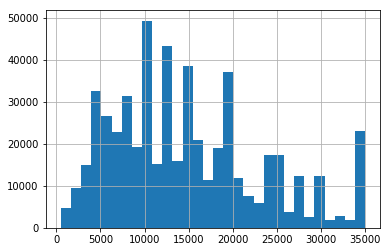

In [37]:
data.loan_amnt.hist(bins=30)

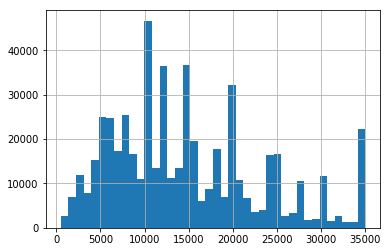

In [38]:
data.funded_amnt.hist(bins=40)

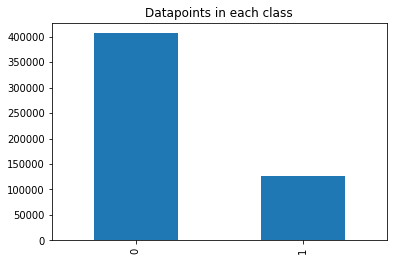

In [39]:
data.loan_status.value_counts().plot(kind="bar", title="Datapoints in each class");

## Split Training Set

In [40]:
split = int(len(data)*0.8)

# four most important features, performance score = 0.8685
major = ['tot_cur_bal', 'last_week_pay', 'total_rev_hi_lim', 'int_rate']

# not so important features, performance score = 0.7634
minor = ['tot_cur_bal','zip_code', 'addr_state', 'revol_util', 'revol_bal', 'sub_grade', 'annual_inc', 'total_rec_int']

data = data.dropna()
X_train = data[data['loan_status'] >= 0].iloc[:split,:-1][major]
Y_train = data[data['loan_status'] >= 0].iloc[:split,-1:]
X_test = data[data['loan_status'] >= 0].iloc[split:,:-1][major]
Y_test = data[data['loan_status'] >= 0].iloc[split:,-1:]

## Model #1: Random Forest Classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
# load model from pretrained model
#rf = joblib.load('rf01.pkl') 

In [43]:
rf = RandomForestClassifier(n_estimators=100, verbose=5, n_jobs=-1)
rf.fit(X_train, Y_train)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.8s


building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56

[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   38.5s


building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=5, warm_start=False)

In [44]:
# save model
#from sklearn.externals import joblib
#joblib.dump(rf, 'rf01.pkl') 

In [45]:
preds = rf.predict(X_test)
fpr1, tpr1, thr1 = roc_curve(Y_test['loan_status'], preds)
auc1 = roc_auc_score(Y_test['loan_status'], preds)

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.0s finished


In [46]:
print(auc1)
rf.score(X_test, Y_test)

0.775570455721


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished


0.86843340908664046

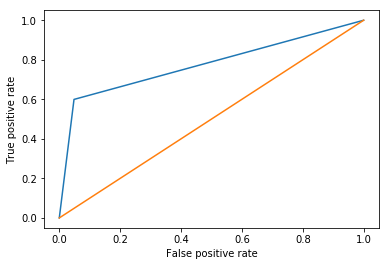

In [50]:
plt.plot(fpr1,tpr1)
plt.plot(fpr1,fpr1)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [25]:
fi = list(zip(X_train.columns.values, rf.feature_importances_))
fi = sorted(fi, key=lambda x: -x[1])
pd.DataFrame(fi, columns=["Feature","Importance"])

,Feature,Importance
0,tot_cur_bal,0.300879
1,int_rate,0.269451
2,total_rev_hi_lim,0.242287
3,last_week_pay,0.187383


In [29]:
from sklearn.model_selection import validation_curve

In [55]:
rfc_train_scores, rfc_valid_scores = validation_curve(RandomForestClassifier(oob_score=True), X_train, Y_train.values.reshape(-1), 
                                                     'n_estimators', np.arange(100,1000,100), n_jobs=-1, verbose=2)

[CV] n_estimators=100 ................................................
[CV] n_estimators=200 ................................................
[CV] n_estimators=300 ................................................
[CV] n_estimators=400 ................................................
[CV] n_estimators=500 ................................................
[CV] n_estimators=600 ................................................
[CV] n_estimators=700 ................................................
[CV] n_estimators=800 ................................................
[CV] n_estimators=900 ................................................
[CV] n_estimators=100 ................................................
[CV] n_estimators=200 ................................................
[CV] n_estimators=300 ................................................
[CV] n_estimators=400 ................................................
[CV] n_estimators=500 ................................................
[CV] n

[Parallel(n_jobs=-1)]: Done  14 out of  27 | elapsed:  8.0min remaining:  7.4min


[CV] ....................................... n_estimators=500 -  27.3s
[CV] ....................................... n_estimators=600 -  32.6s
[CV] ....................................... n_estimators=600 -  33.4s
[CV] ....................................... n_estimators=600 -  33.5s
[CV] ....................................... n_estimators=700 -  37.6s
[CV] ....................................... n_estimators=700 -  38.3s
[CV] ....................................... n_estimators=700 -  39.0s
[CV] ....................................... n_estimators=800 -  44.7s
[CV] ....................................... n_estimators=800 -  44.4s
[CV] ....................................... n_estimators=800 -  42.7s
[CV] ....................................... n_estimators=900 -  48.0s
[CV] ....................................... n_estimators=900 -  47.9s
[CV] ....................................... n_estimators=900 -  48.3s


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 14.2min finished


In [58]:
rfc_train_scores_mean = np.mean(rfc_train_scores, axis=1)
rfc_train_scores_std = np.std(rfc_train_scores, axis=1)
rfc_valid_scores_mean = np.mean(rfc_valid_scores, axis=1)
rfc_valid_scores_std = np.std(rfc_valid_scores, axis=1)
rfc_param_range = np.arange(100,1000,100)

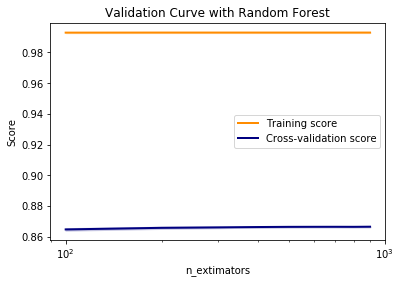

In [59]:
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_extimators")
plt.ylabel("Score")
lw=2
plt.semilogx(rfc_param_range, rfc_train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(rfc_param_range, rfc_train_scores_mean - rfc_train_scores_std,
                 rfc_train_scores_mean + rfc_train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(rfc_param_range, rfc_valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(rfc_param_range, rfc_valid_scores_mean - rfc_valid_scores_std,
                 rfc_valid_scores_mean + rfc_valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
plt.show()

**Observation**: Cross Validation score does not increase with estimators numbers.

## Prediction

In [ ]:
data_test = pd.read_csv("input/test_indessa.csv")
rows = data_test['member_id'].copy()

In [ ]:
print("Shape: ", data_test.shape)
data_test[:5]

In [ ]:
data_test = data_test.fillna("0")

In [ ]:
data_test['last_week_pay'] = data_test['last_week_pay'].str.extract('(\d+)', expand=False).astype(float)

In [ ]:
data_test.drop(drop_cols, 1, inplace=True)

In [ ]:
for col in cat_cols:
    data_test[col] = le[col].transform(data_test[col])
    print(col)

In [ ]:
data_test = data_test.fillna(0)

In [ ]:
pred_test = rf.predict_proba(data_test)

In [ ]:
pred_frame = pd.DataFrame({'member_id': rows, 'loan_status': pred_test[:,1]})

In [ ]:
pred_frame.to_csv('submission.csv', index=False, columns=['member_id', 'loan_status'], float_format='%g')

## Model #2: KNeighborsClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knc = KNeighborsClassifier(n_neighbors=150, n_jobs=-1)
knc.fit(X_train, Y_train)

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=150, p=2,
           weights='uniform')

In [62]:
preds_knc = knc.predict(X_test)

In [63]:
knc.score(X_test, Y_test)

0.81170294686625477

In [89]:
knc_train_scores, knc_valid_scores = validation_curve(KNeighborsClassifier(), X_train, Y_train.values.reshape(-1), 
                                             'n_neighbors', np.arange(50,300,50), n_jobs=-1, verbose=2)

[CV] n_neighbors=50 ..................................................
[CV] n_neighbors=100 .................................................
[CV] n_neighbors=150 .................................................
[CV] n_neighbors=200 .................................................
[CV] n_neighbors=250 .................................................
[CV] n_neighbors=50 ..................................................
[CV] n_neighbors=100 .................................................
[CV] n_neighbors=150 .................................................
[CV] n_neighbors=200 .................................................
[CV] n_neighbors=250 .................................................
[CV] n_neighbors=50 ..................................................
[CV] n_neighbors=100 .................................................
[CV] n_neighbors=150 .................................................
[CV] n_neighbors=200 .................................................
[CV] n

[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   25.8s remaining:   22.6s


[CV] ........................................ n_neighbors=150 -   8.5s
[CV] ........................................ n_neighbors=200 -  10.2s
[CV] ........................................ n_neighbors=200 -  10.9s
[CV] ........................................ n_neighbors=200 -  11.0s
[CV] ........................................ n_neighbors=250 -  12.7s
[CV] ........................................ n_neighbors=250 -  12.9s
[CV] ........................................ n_neighbors=250 -  13.4s


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   38.7s finished


In [92]:
knc_train_scores_mean = np.mean(knc_train_scores, axis=1)
knc_train_scores_std = np.std(knc_train_scores, axis=1)
knc_valid_scores_mean = np.mean(knc_valid_scores, axis=1)
knc_valid_scores_std = np.std(knc_valid_scores, axis=1)
knc_param_range = np.arange(50,300,50)

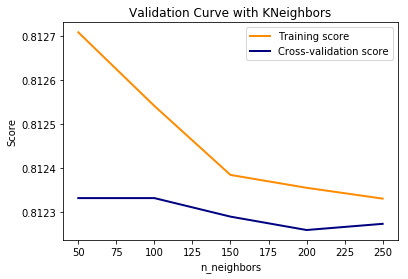

In [94]:
plt.title("Validation Curve with KNeighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
lw=2
plt.plot(knc_param_range, knc_train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.plot(knc_param_range, knc_valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
plt.show()

**Observation**: The performance is worse than random forest. Increasing neighbors is also ineffective.

## Model #3: SGDClassifier with modified_huber

In [26]:
from sklearn.linear_model import SGDClassifier

In [27]:
sgd = SGDClassifier(loss='modified_huber', verbose=2, n_jobs=-1, n_iter=300)
sgd.fit(X_train, Y_train)

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 21428.21, NNZs: 4, Bias: -2506.825063, T: 425942, Avg. loss: 14995990178.742754
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 16863.02, NNZs: 4, Bias: -2801.689826, T: 851884, Avg. loss: 8382731043.040318
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 12714.59, NNZs: 4, Bias: -2975.513198, T: 1277826, Avg. loss: 5925252260.053709
Total training time: 0.09 seconds.
-- Epoch 4
Norm: 13684.34, NNZs: 4, Bias: -3110.111085, T: 1703768, Avg. loss: 4619793077.867056
Total training time: 0.12 seconds.
-- Epoch 5
Norm: 11800.44, NNZs: 4, Bias: -3211.377265, T: 2129710, Avg. loss: 3807248527.703013
Total training time: 0.15 seconds.
-- Epoch 6
Norm: 16245.19, NNZs: 4, Bias: -3286.108641, T: 2555652, Avg. loss: 3250284771.776394
Total training time: 0.18 seconds.
-- Epoch 7
Norm: 12461.94, NNZs: 4, Bias: -3354.224221, T: 2981594, Avg. loss: 2840991647.171287
Total training time: 0.21 seconds.
-- Epoch 8
Norm: 11984.53, NNZs: 4, Bias: -3409.321781, T: 3407536, Avg. loss

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', n_iter=300,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=2, warm_start=False)

In [28]:
sgd.score(X_test, Y_test)

0.80837856619649529

In [65]:
# Second try: use perceptron loss function
sgd_perceptron = SGDClassifier(loss='perceptron', verbose=2, n_jobs=-1, n_iter=300)
sgd_perceptron.fit(X_train, Y_train)

/home/carnd/anaconda3/envs/dl/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 3339.53, NNZs: 4, Bias: -533.968001, T: 425942, Avg. loss: 904939107.263728
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4315.30, NNZs: 4, Bias: -613.462790, T: 851884, Avg. loss: 505574139.213352
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 3674.50, NNZs: 4, Bias: -653.659856, T: 1277826, Avg. loss: 358452055.396310
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 3061.25, NNZs: 4, Bias: -683.682670, T: 1703768, Avg. loss: 280066792.485501
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 3053.69, NNZs: 4, Bias: -706.524557, T: 2129710, Avg. loss: 230984907.244141
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 4043.68, NNZs: 4, Bias: -724.641965, T: 2555652, Avg. loss: 197301579.308507
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 3012.20, NNZs: 4, Bias: -741.755732, T: 2981594, Avg. loss: 172564148.336256
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 2980.69, NNZs: 4, Bias: -756.002697, T: 3407536, Avg. loss: 153577632.010043
Total

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=300, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=2, warm_start=False)

In [66]:
sgd_perceptron.score(X_test, Y_test)

0.80820013898540655

**Observation**: performance doesn't increase by using perceptron loss function.

In [30]:
train_scores, valid_scores = validation_curve(SGDClassifier(loss='modified_huber'), X_train, Y_train.values.reshape(-1), 
                                             'n_iter', np.arange(100,10000,100), n_jobs=-1, verbose=2)

[CV] n_iter=100 ......................................................
[CV] n_iter=200 ......................................................
[CV] n_iter=300 ......................................................
[CV] n_iter=400 ......................................................
[CV] n_iter=500 ......................................................
[CV] n_iter=600 ......................................................
[CV] n_iter=700 ......................................................
[CV] n_iter=800 ......................................................
[CV] n_iter=900 ......................................................
[CV] n_iter=1000 .....................................................
[CV] n_iter=1100 .....................................................
[CV] n_iter=1200 .....................................................
[CV] n_iter=1300 .....................................................
[CV] n_iter=1400 .....................................................
[CV] n

[Parallel(n_jobs=-1)]: Done 149 out of 297 | elapsed: 13.2min remaining: 13.2min


[CV] n_iter=1500 .....................................................
[CV] ............................................ n_iter=5200 -   0.1s
[CV] n_iter=1600 .....................................................
[CV] ............................................ n_iter=9300 -   0.1s
[CV] n_iter=1700 .....................................................
[CV] ............................................ n_iter=5300 -   0.1s
[CV] n_iter=1800 .....................................................
[CV] ............................................. n_iter=700 -   0.1s
[CV] n_iter=1900 .....................................................
[CV] ............................................ n_iter=5400 -   0.1s
[CV] n_iter=2000 .....................................................
[CV] ............................................. n_iter=800 -   0.1s
[CV] n_iter=2100 .....................................................
[CV] ............................................ n_iter=9500 -   0.2s
[CV] n

[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed: 27.3min finished


In [33]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
param_range = np.arange(100,10000,100)

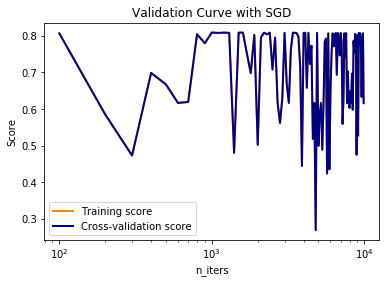

In [64]:
plt.title("Validation Curve with SGD")
plt.xlabel("n_iters")
plt.ylabel("Score")
lw=2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.semilogx(param_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
plt.show()

**Observation**: SGD's performance top at 0.8, increasing n_iters is ineffective.